# Lab 2: Estimating Parameters of a Gamma Distribution

**Objective:** Estimate parameters using MLE and MME, and compare their performance.

## 1. Imports and Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize
%matplotlib inline


## 2. Simulation Settings
Define sample sizes and parameter settings for the Gamma distribution.

In [4]:
sample_sizes = [50, 100, 500, 1000, 5000]
param_settings = [
    (1, 1), (2, 1), (2, 2), (5, 1), (5, 2),
    (5, 5), (9, 1), (9, 2), (9, 5), (9, 9)
]


## 3. Estimation Functions
Define the Method of Moments Estimator (MME) and Maximum Likelihood Estimator (MLE).

In [5]:
def mme_estimator(data):
    x_bar = np.mean(data)
    s2 = np.var(data, ddof=0)
    alpha_hat = x_bar**2 / s2
    beta_hat = s2 / x_bar
    return alpha_hat, beta_hat

def mle_estimator(data, initial=(1.0, 1.0)):
    def neg_log_lik(params):
        a, b = params
        if a <= 0 or b <= 0:
            return np.inf
        return -np.sum(stats.gamma.logpdf(data, a, scale=b))
    res = minimize(neg_log_lik, initial, bounds=[(1e-6, None), (1e-6, None)])
    return res.x


## 4. Simulation and Estimation
Run simulations for each combination of sample size and true parameters, then compute estimates.

In [6]:
results = []
for n in sample_sizes:
    for alpha_true, beta_true in param_settings:
        data = np.random.gamma(alpha_true, beta_true, size=n)
        alpha_mme, beta_mme = mme_estimator(data)
        alpha_mle, beta_mle = mle_estimator(data, initial=(alpha_true, beta_true))
        results.append({
            'n': n,
            'alpha_true': alpha_true,
            'beta_true': beta_true,
            'alpha_mme': alpha_mme,
            'beta_mme': beta_mme,
            'alpha_mle': alpha_mle,
            'beta_mle': beta_mle
        })

results_df = pd.DataFrame(results)
results_df


,n,alpha_true,beta_true,alpha_mme,beta_mme,alpha_mle,beta_mle
0,50,1,1,0.524658,1.857591,0.752254,1.295573
1,50,2,1,1.964928,1.038454,2.175176,0.938080
2,50,2,2,2.303893,1.515273,2.488326,1.402964
3,50,5,1,4.639760,1.059030,5.040774,0.974780
4,50,5,2,5.794128,1.629370,4.907555,1.923727
5,50,5,5,4.095955,6.677319,4.485972,6.096783
6,50,9,1,11.187245,0.773850,11.257754,0.769003
7,50,9,2,8.468641,2.136920,7.999411,2.262268
8,50,9,5,9.448242,4.517216,9.824845,4.344063
9,50,9,9,7.551242,10.653100,8.277269,9.718681


## 5. Plotting Distributions
Overlay the true, MME, and MLE fitted PDFs on the histogram of the sample data.

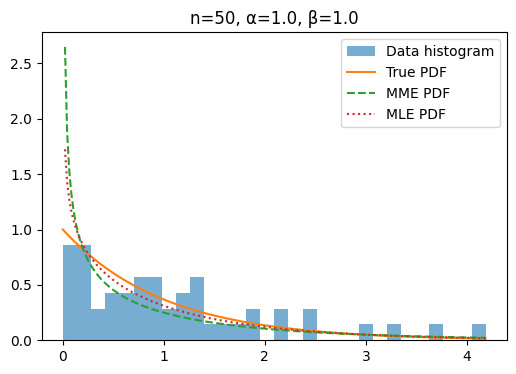

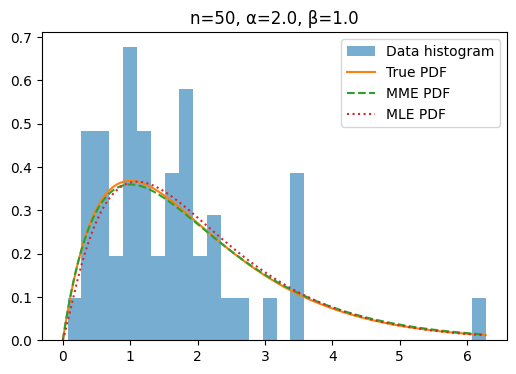

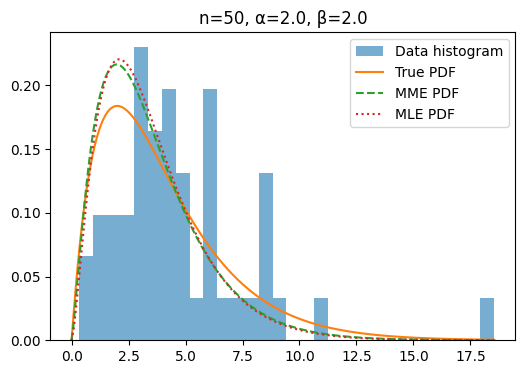

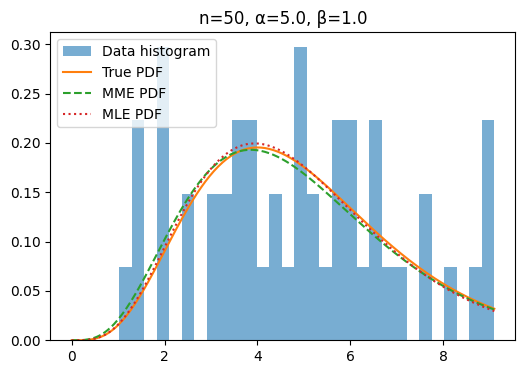

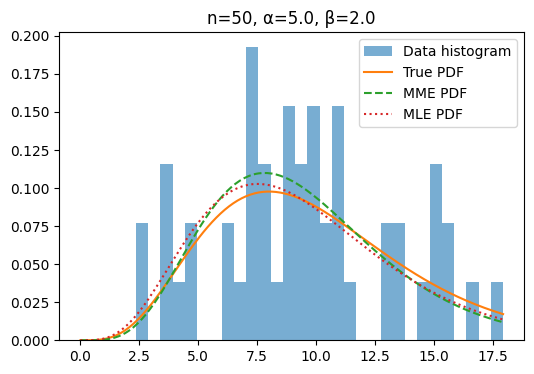

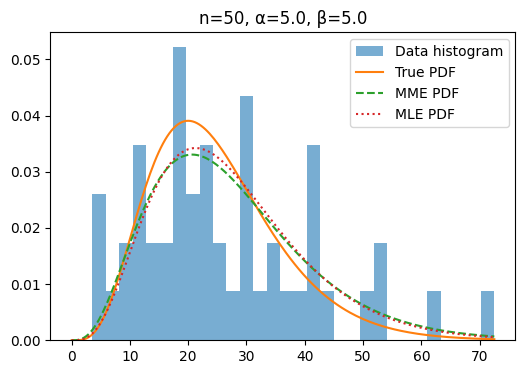

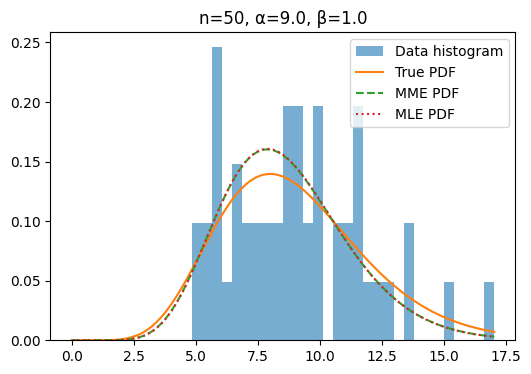

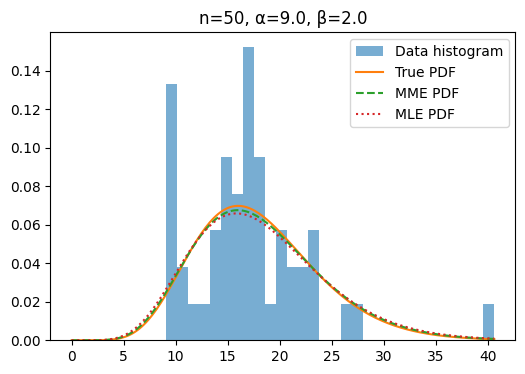

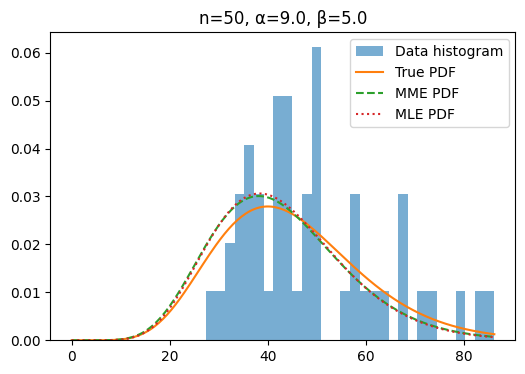

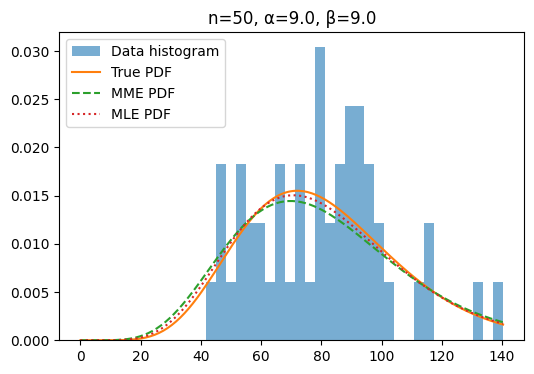

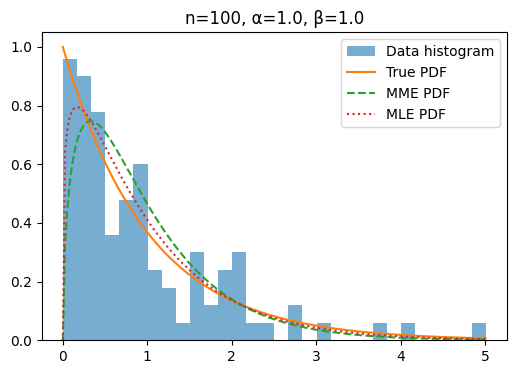

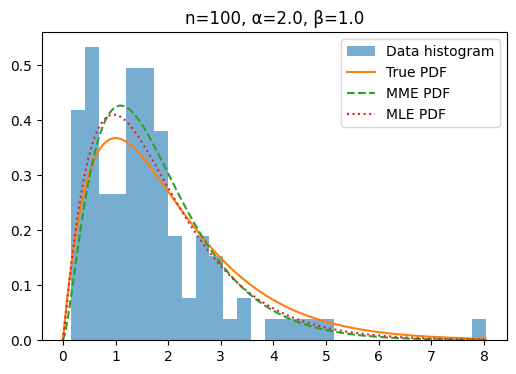

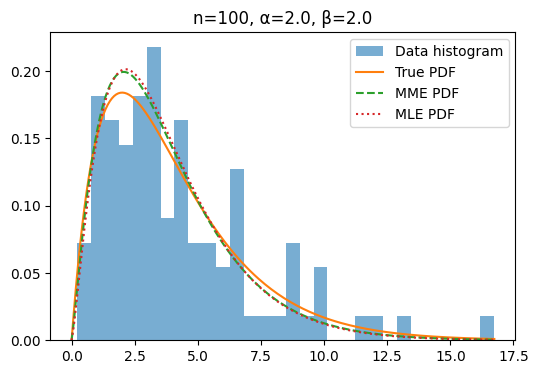

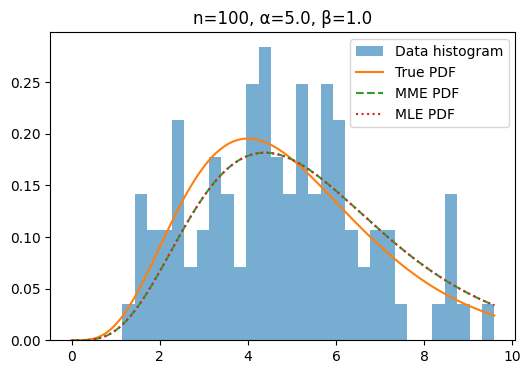

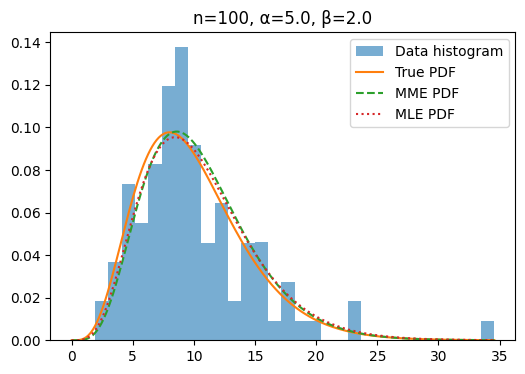

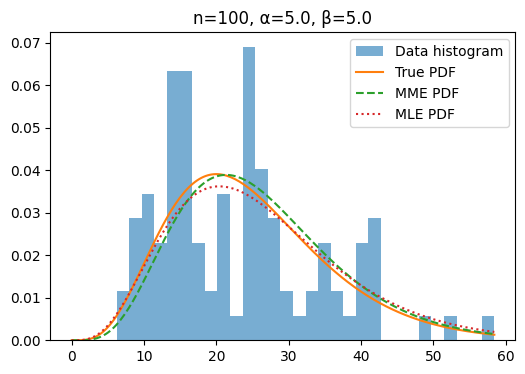

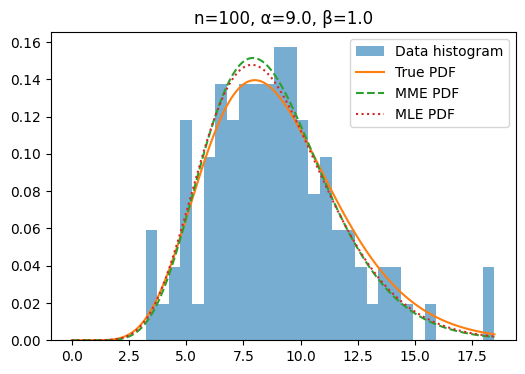

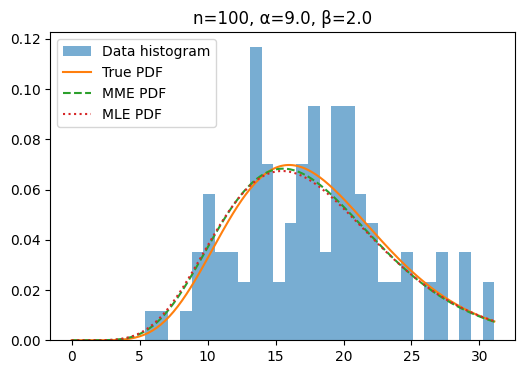

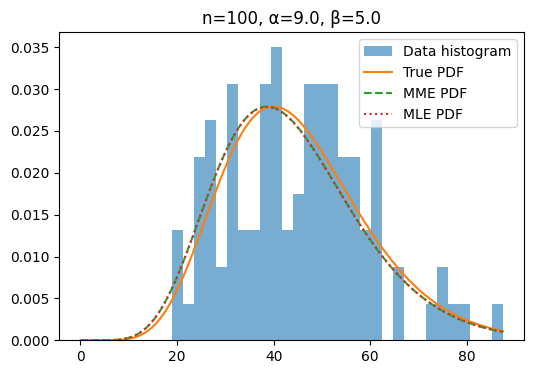

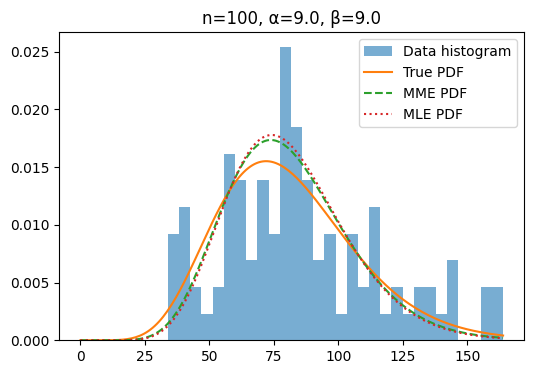

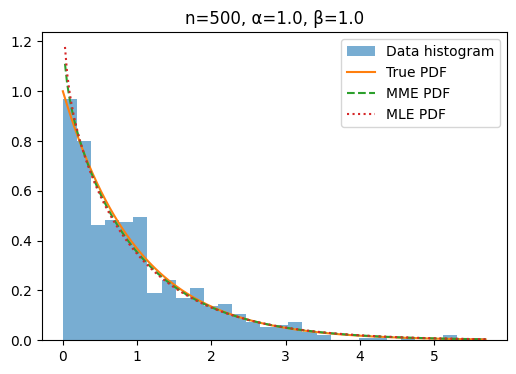

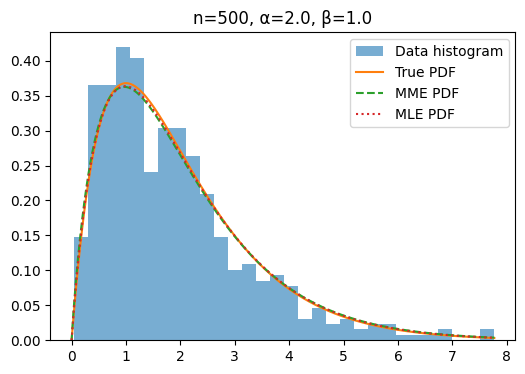

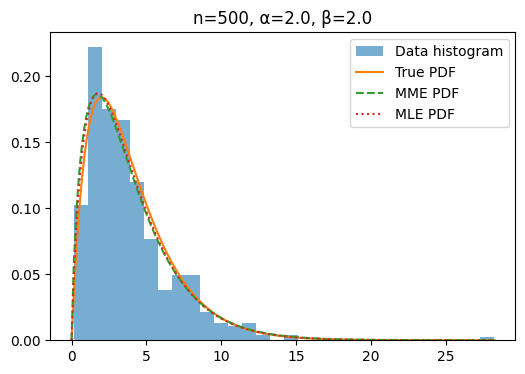

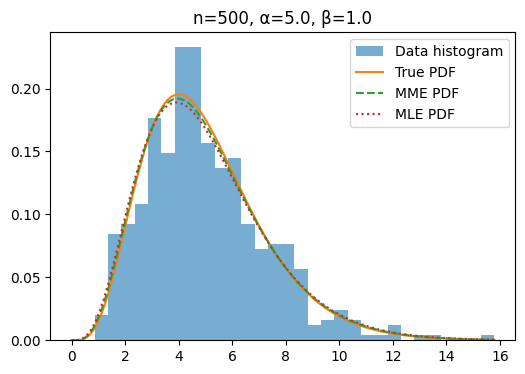

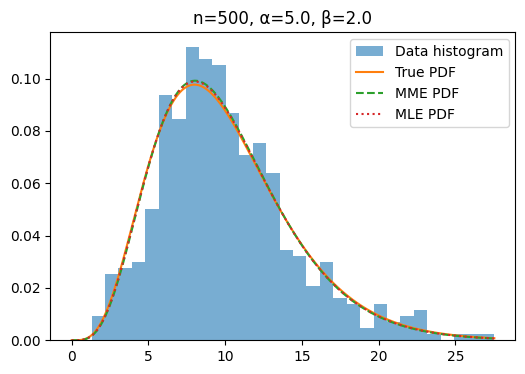

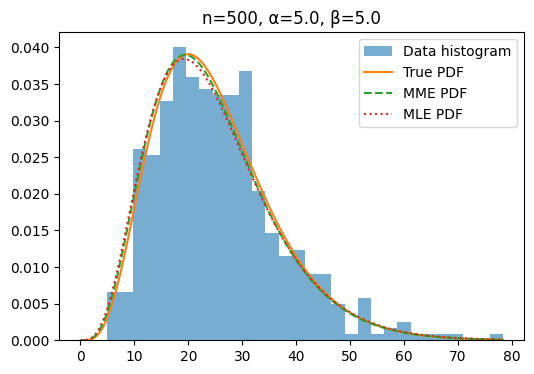

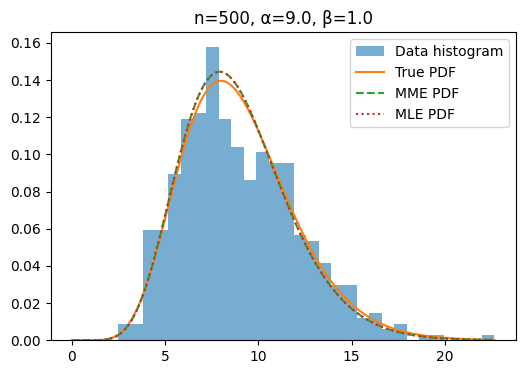

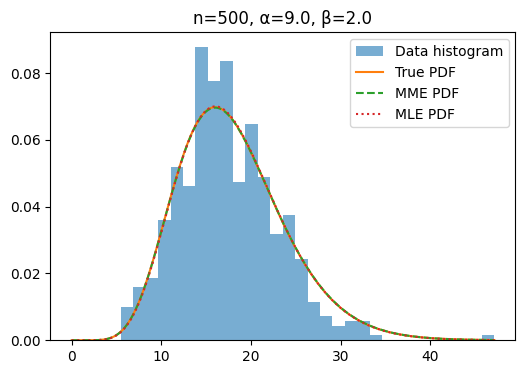

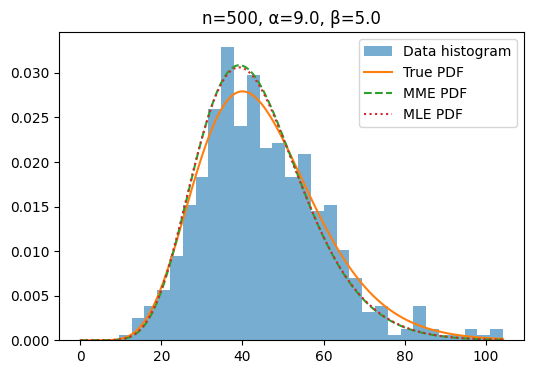

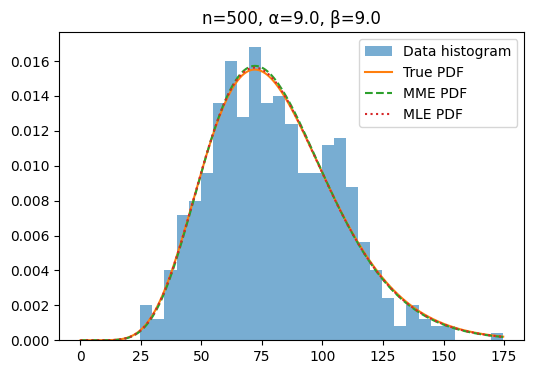

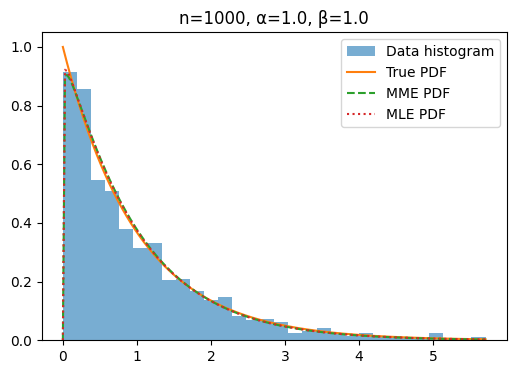

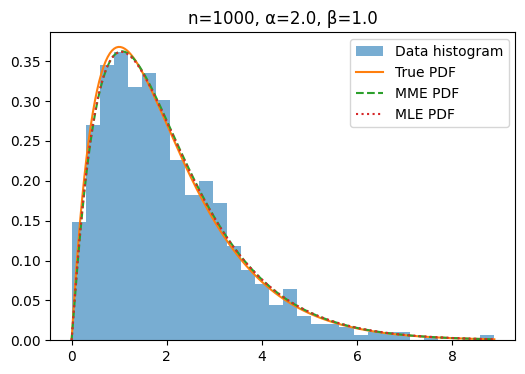

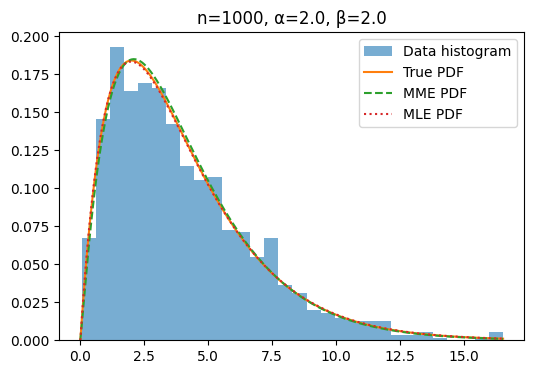

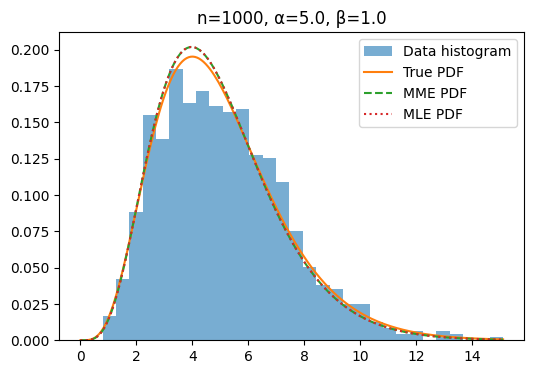

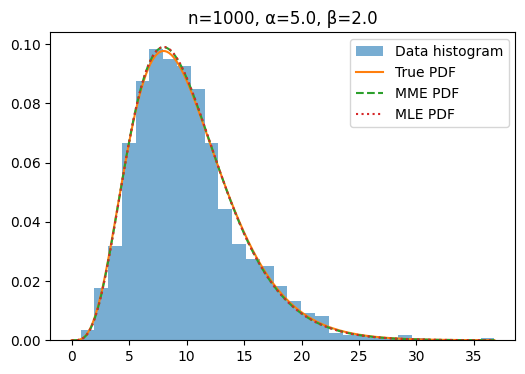

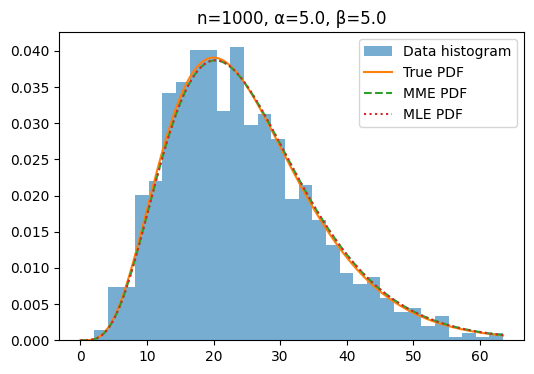

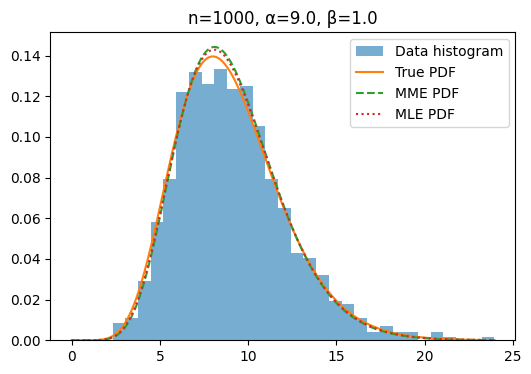

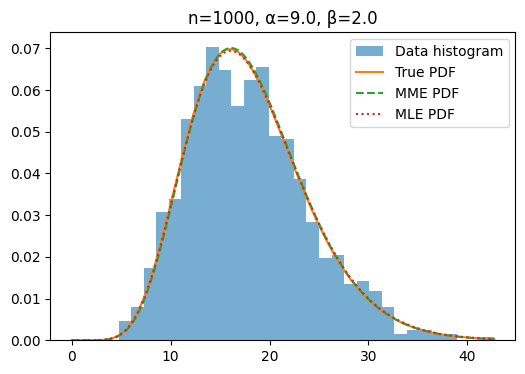

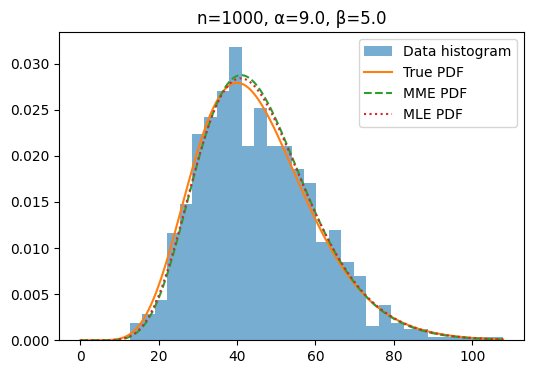

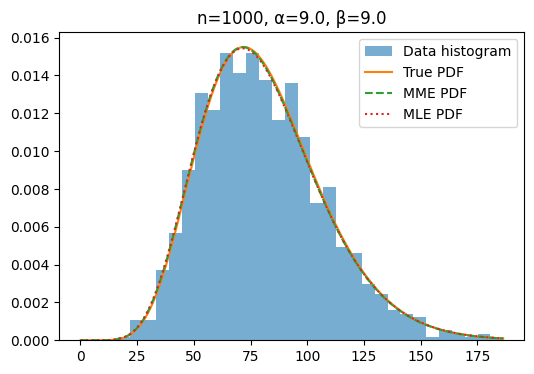

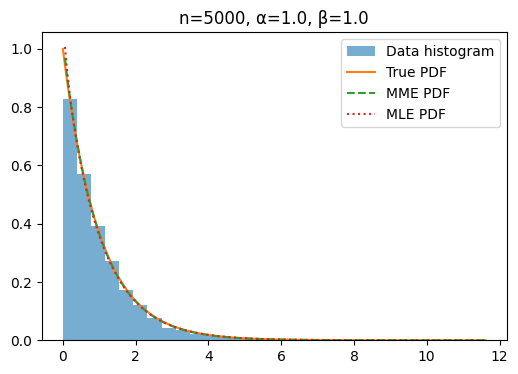

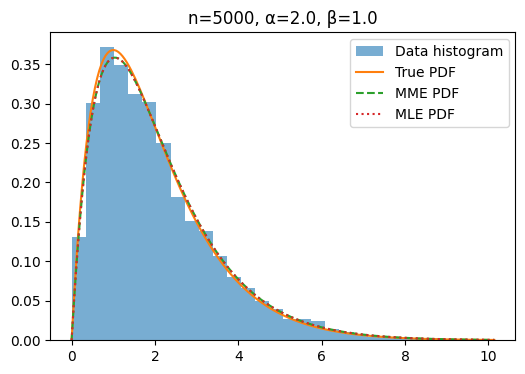

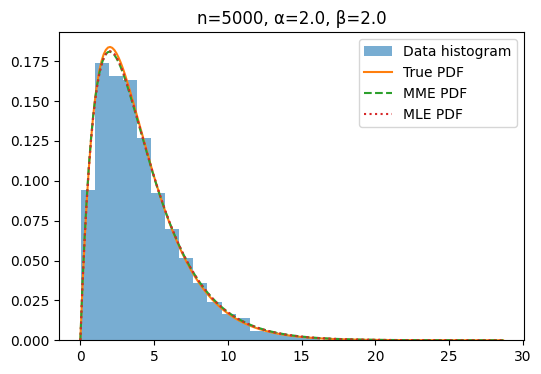

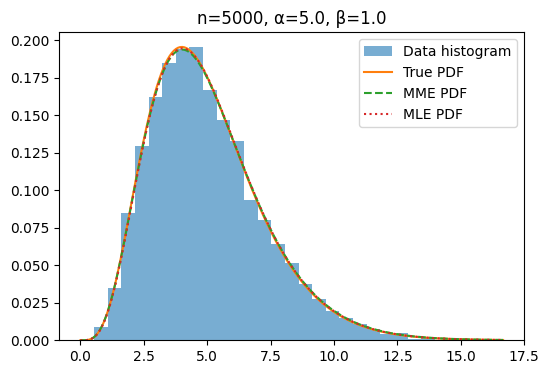

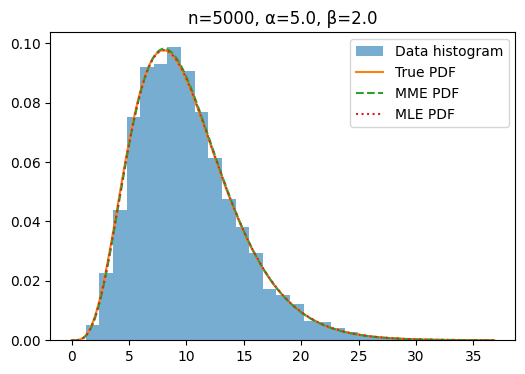

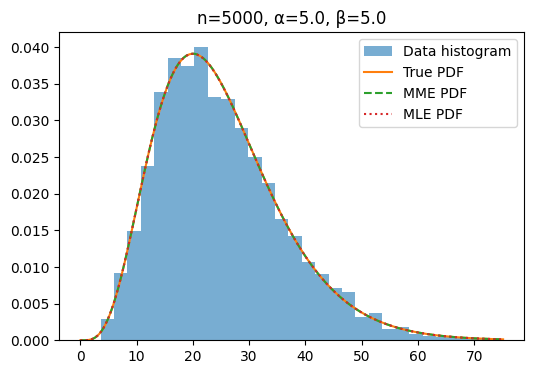

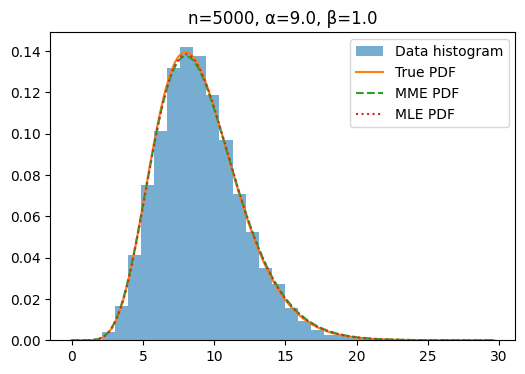

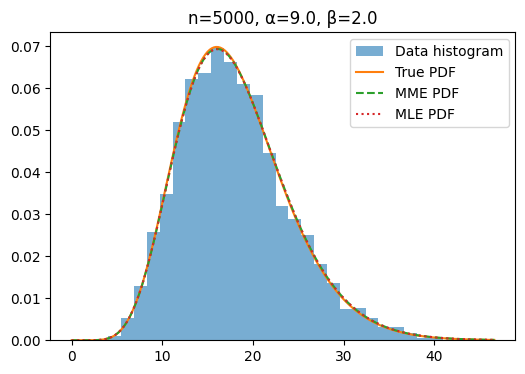

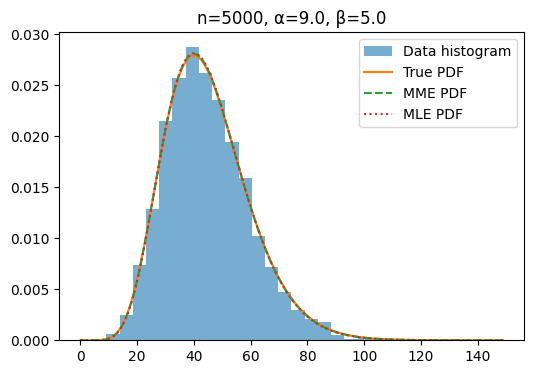

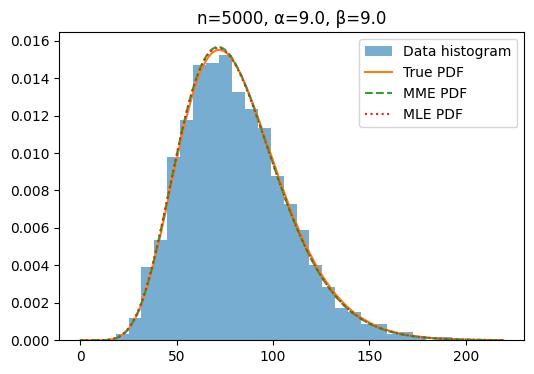

In [7]:
for idx, row in results_df.iterrows():
    data = np.random.gamma(row['alpha_true'], row['beta_true'], size=int(row['n']))
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, density=True, alpha=0.6, label='Data histogram')
    x = np.linspace(0, data.max(), 200)
    plt.plot(x, stats.gamma.pdf(x, row['alpha_true'], scale=row['beta_true']), label='True PDF')
    plt.plot(x, stats.gamma.pdf(x, row['alpha_mme'], scale=row['beta_mme']), '--', label='MME PDF')
    plt.plot(x, stats.gamma.pdf(x, row['alpha_mle'], scale=row['beta_mle']), ':', label='MLE PDF')
    plt.title(f"n={int(row['n'])}, α={row['alpha_true']}, β={row['beta_true']}")
    plt.legend()
    plt.show()


## 6. Conclusions
- Analyze the bias and variance of the estimators across different sample sizes and parameter settings.
- Discuss scenarios where MLE outperforms MME and vice versa.